In [87]:
import pandas as pd
data=pd.read_csv('/content/IRIS (2).csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


array([[<Axes: title={'center': 'sepal_length'}, xlabel='species'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='species'>],
       [<Axes: title={'center': 'petal_length'}, xlabel='species'>,
        <Axes: title={'center': 'petal_width'}, xlabel='species'>]],
      dtype=object)

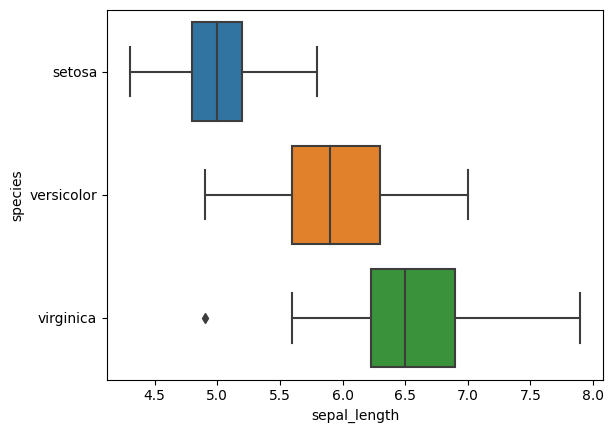

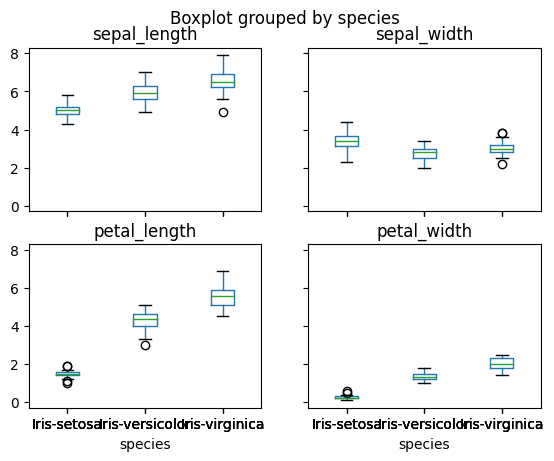

In [ ]:
#boxplot for 5-no-summary(min,q1,q2,q3,max)
import seaborn as sns
df=sns.load_dataset("iris")
sns.boxplot(data=df,x="sepal_length",y="species") # x can be of any of the 4 classes
#another way usinf data itself
data.boxplot(by ='species', column =['sepal_length','sepal_width','petal_length','petal_width'], grid = False)

In [ ]:
#Compution of all the boxplot values
import numpy as np
print("min :",min(df["sepal_length"]))
print("max :",max(df["sepal_length"]))
quartile=np.quantile(df["sepal_length"],[0.25,0.5,0.75])
print("quartile1 :",quartile[0])
print("quartile2 :",quartile[1])
print("quartile3 :",quartile[2])
print("IQR :",quartile[2]-quartile[0])
iqr=quartile[2]-quartile[0]
print("Lower bound :",quartile[0]-1.5*(iqr))
print("Upper bound :",quartile[2]+1.5*(iqr))

min : 4.3
max : 7.9
quartile1 : 5.1
quartile2 : 5.8
quartile3 : 6.4
IQR : 1.3000000000000007
Lower bound : 3.1499999999999986
Upper bound : 8.350000000000001


[1.0286112808972354, -0.12454037930145856, 0.33672028477801946, 0.10608995273828047, 1.2592416129369746, 1.9511326090561905, 0.7979809488574965, 0.7979809488574965, -0.3551707113411976, 0.10608995273828047, 1.4898719449767135, 0.7979809488574965, -0.12454037930145856, -0.12454037930145856, 2.1817629410959296, 1.9511326090561905, 1.0286112808972354, 1.7205022770164515, 1.7205022770164515, 0.7979809488574965, 1.4898719449767135, 1.2592416129369746, 0.5673506168177574, 0.7979809488574965, -0.12454037930145856, 0.7979809488574965, 1.0286112808972354, 0.7979809488574965, 0.33672028477801946, 0.10608995273828047, 0.7979809488574965, 2.4123932731356676, 2.6430236051754075, 0.10608995273828047, 0.33672028477801946, 1.0286112808972354, 1.2592416129369746, -0.12454037930145856, 0.7979809488574965, 1.0286112808972354, -1.7389527035796306, 0.33672028477801946, 1.0286112808972354, 1.7205022770164515, -0.12454037930145856, 1.7205022770164515, 0.33672028477801946, 1.4898719449767135, 0.56735061681775

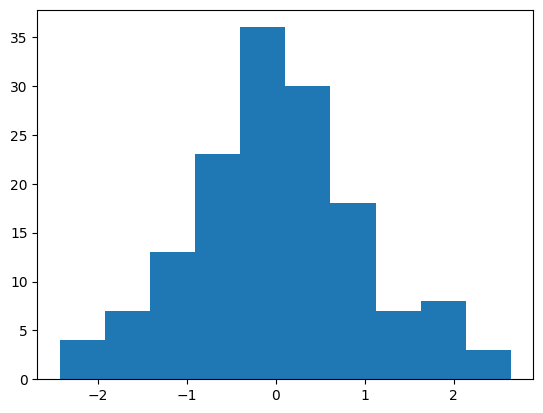

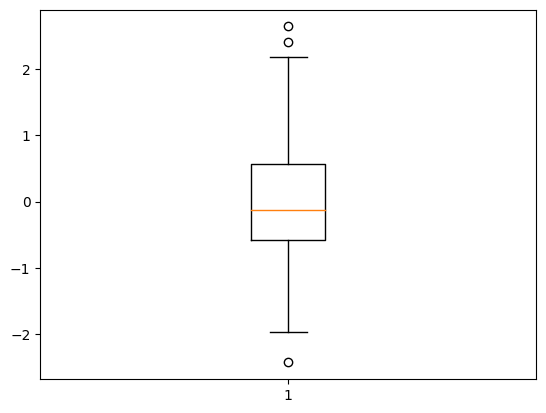

In [ ]:
#Z_score for sepal_width
import statistics as st
import matplotlib.pyplot as plt
mean=st.mean(data["sepal_width"])
sd=st.stdev(data["sepal_width"])
new_data=[]

for i in df["sepal_width"]:
  val=(i-mean)/sd
  if(val>=-3 and val<=3):
    new_data.append(val)
print(new_data)
plt.hist(new_data)
plt.show()

plt.boxplot(new_data)
plt.show()


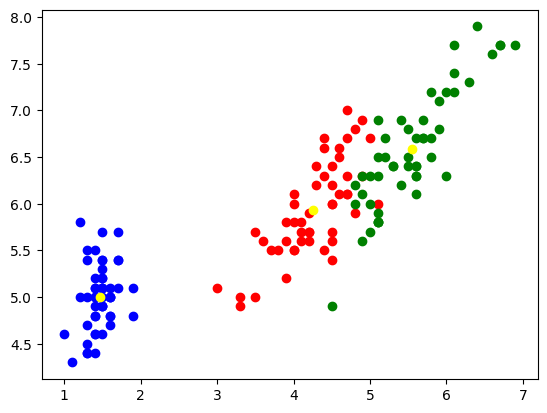

In [ ]:
#scatter plot for petal_length and sepal_length and plotting the mean in the scatter plot
df1=data[data["species"]=="Iris-setosa"]
df2=data[data["species"]=="Iris-versicolor"]
df3=data[data["species"]=="Iris-virginica"]
plt.scatter(df1['petal_length'],df1['sepal_length'],color="blue")
plt.scatter(df2['petal_length'],df2['sepal_length'],color="red")
plt.scatter(df3['petal_length'],df3['sepal_length'],color="green")
a=df1['petal_length'].mean()
b=df1['sepal_length'].mean()
plt.scatter(a,b,color="yellow")
c=df2['petal_length'].mean()
d=df2['sepal_length'].mean()
plt.scatter(c,d,color="yellow")
e=df3['petal_length'].mean()
f=df3['sepal_length'].mean()
plt.scatter(e,f,color="yellow")

Here for all classes mean is at the middle point.



In [ ]:
#finding the covariance and inverse ,to find orthogonal matrix
data_cov=data.cov()
data_cov_inv=np.linalg.inv(data_cov)
product=np.dot(data_cov,data_cov_inv)
iden=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
if(np.allclose(iden,product)):
    print('ORTHOGONAL MATRIX')

ORTHOGONAL MATRIX


<ipython-input-18-0f1d15bed0aa>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cov=data.cov()


In [ ]:
#correlation coeff
data_cor_coeff=np.corrcoef(df['sepal_length'],df['petal_length'])
data_cor_coeff

array([[1.        , 0.87175378],
       [0.87175378, 1.        ]])

In [ ]:
#eigen_values
eig=np.linalg.eigvals(data_cov)
eig
var=np.diag(data_cov)
var

print("Sum of the eigen values : ",sum(eig))
print("Sum of variance : ",sum(np.diag(data_cov)))

Sum of the eigen values :  4.569291275167782
Sum of variance :  4.569291275167785


Mahabalonis distance

In [ ]:
df1=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df1['sepal_length']=df1['sepal_length']-df1['sepal_length'].mean()    #x-meu done inside the dataset for all four classes
df1['sepal_width']=df1['sepal_width']-df1['sepal_width'].mean()
df1['petal_length']=df1['petal_length']-df1['petal_length'].mean()
df1['petal_width']=df1['petal_width']-df1['petal_width'].mean()
mahal_distance=[]
for i in range(0,len(df1['sepal_length']),1):
    x_meu_trans=[df1['sepal_length'][i],df1['sepal_width'][i],df1['petal_length'][i],df1['petal_width'][i]] #this is transpose
    x_meu=np.transpose(x_meu_trans)
    mahal_dist=np.sqrt(np.dot(np.dot(x_meu,data_cov_inv),x_meu_trans)) #formula
    mahal_distance.append(mahal_dist)

data['mahal_dist']=mahal_distance
data

,sepal_length,sepal_width,petal_length,petal_width,species,mahal_dist
0,5.1,3.5,1.4,0.2,Iris-setosa,1.466857
1,4.9,3.0,1.4,0.2,Iris-setosa,1.676396
2,4.7,3.2,1.3,0.2,Iris-setosa,1.441540
3,4.6,3.1,1.5,0.2,Iris-setosa,1.564173
4,5.0,3.6,1.4,0.2,Iris-setosa,1.583905
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.013078
146,6.3,2.5,5.0,1.9,Iris-virginica,2.019424
147,6.5,3.0,5.2,2.0,Iris-virginica,1.328234
148,6.2,3.4,5.4,2.3,Iris-virginica,2.763425


Concave and convex function

In [ ]:
import sympy as sp

x=sp.symbols('x')
inputs=str(input())
val=sp.sympify(inputs)
expr1=sp.Derivative(val,x)
expr2=sp.Derivative(expr1.doit(),x)
if(expr2.doit().subs(x,-1)>0 and expr2.doit().subs(x,1)>0):
  print("convex function")
else:
  print("concave function")


x**2
convex function


Contour function

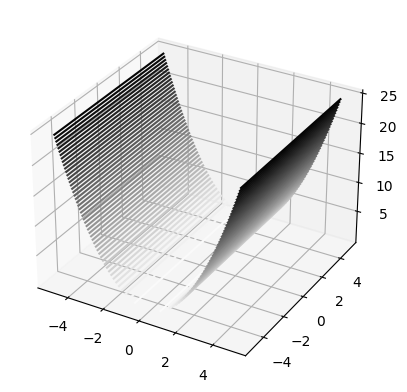

In [ ]:
def func(x, y):
    return x**2

# generate 50 values b/w 0 a5
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)

# Generate combination of grids
X, Y = np.meshgrid(x, y)
Z = func(X, Y)

# Draw rectangular contour plot
# plt.contour(X, Y, Z, cmap='gist_rainbow_r');
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
plt.show()

BATCH GRADIENT DESCENT

x**2-4*x
1.99943577801851


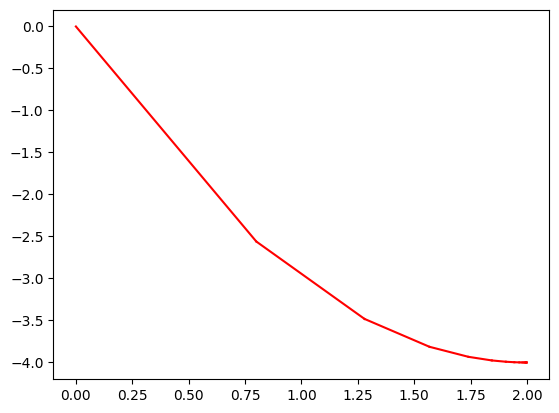

In [ ]:
#function is only for the graphh
def f(x):
  return x*x-4*x

x=sp.symbols('x')
inputs=input()
expr=sp.sympify(inputs)
val=sp.Derivative(expr)         #first derivative
xnew=0
xold=3
eta=0.2
while(round(xnew,3)!=round(xold,3)):      #convergence condition
  xold=xnew
  a=val.doit().subs(x,xold)
  xnew=xold-eta*a
  plt.plot((xold,xnew),(f(xold),f(xnew)),color='red')   #plot the function
print(xnew)           #the x_new value

BATCH GRADIENT DESCENT WITH LOGISTIC REGRESSION

In [ ]:
#soap and sud dataset
beta_new=[2,3]
beta_old=[0,0]
x=[4,4.5,5,5.5,6,6.5,7]
y=[33,42,45,51,53,61,62]
while(beta_old!=beta_new):
  beta_old=beta_new
  total_grad=[0,0]
  ycaps=[]
  for i in range(0,len(x),1):
      ycap=np.dot(beta_old,np.transpose([1,x[i]]))      #ycap =[beta0 beta1][1 / xi]
      ycaps.append(ycap)
      grad=(y[i]-ycap)*x[i]
      total_grad[0]+=(y[i]-ycap)                         #for beta0
      total_grad[1]+=grad                                #for beta1
  beta_new=[beta_old[i]+eta*total_grad[i] for i in range(len(beta_old))]    # final formula
  plt.scatter(x,y, color='b')
  plt.plot(x,ycaps, color='g')
print(beta_new)

STOCHASTIC GRADIENT DESCENT

5.800000000000001  18.200000000000003
-3.34  -22.93
29.258000000000006  140.06
-120.45960000000002  -683.3868000000002
734.2964800000003  4445.149680000002
-5179.057400000003  -33991.650540000024
43457.46483600003  306464.0051120002


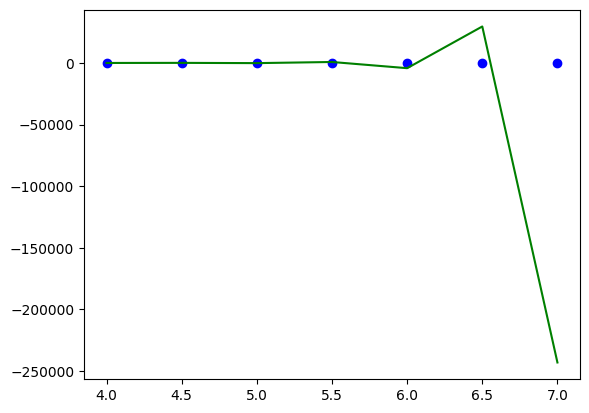

In [ ]:
beta_new=[0,0]
beta_old=[2,3]
x=[4,4.5,5,5.5,6,6.5,7]
y=[33,42,45,51,53,61,62]
epoch=1
ub=1
eta=0.2
while(epoch<=ub):             #using epoch upto the upper bound
  total_grad=[0,0]
  ycaps=[]
  for i in range(0,len(x),1):
      ycap=np.dot(beta_old,np.transpose([1,x[i]]))
      ycaps.append(ycap)
      grad=(y[i]-ycap)*x[i]
      total_grad[0]=(y[i]-ycap)
      total_grad[1]=grad
      beta_new=[beta_old[i]+eta*total_grad[i] for i in range(len(beta_old))]      #changes beta value for every iteration of xi
      beta_old=beta_new
      print(str(beta_new[0])+"  "+str(beta_new[1]))
  plt.scatter(x,y, color='b')
  plt.plot(x,ycaps, color='g')
  epoch+=1

linear regression

In [ ]:
from sklearn import linear_model

In [ ]:
import math

In [ ]:
data1=pd.read_csv('/content/homeprices.csv')
data1.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [ ]:
values=math.floor(data1.bedrooms.median())
data1=data1.fillna(values)
data1

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
model=linear_model.LinearRegression()
X=data1[['area','bedrooms','age']].values
Y=data1[['price']].values
model.fit(X,Y)
model.predict([[3000,5,21]])

array([[606588.65200021]])

In [ ]:
model.coef_

array([[  112.06244194, 23388.88007794, -3231.71790863]])

In [ ]:
model.intercept_

array([221323.0018654])

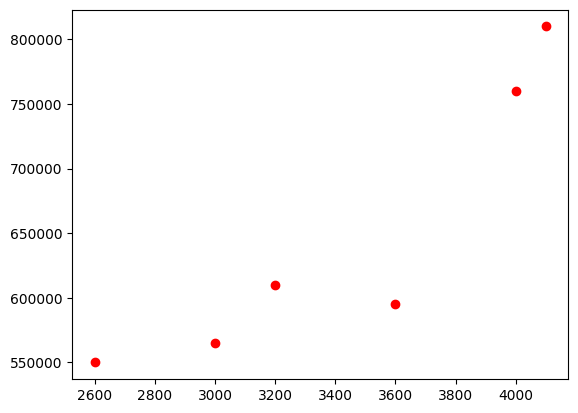

In [ ]:
plt.scatter(data1['area'],data1['price'],color='red')

Logistic regression

In [88]:
mapping={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
data['species']=data['species'].map(mapping)

In [90]:
X=data[['sepal_length','sepal_width','petal_length','petal_width']].values
Y=data[['species']].values
models =linear_model.LogisticRegression()
models.fit(X,Y)
models.score(X,Y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9733333333333334

In [95]:
expected = Y
predicted = models.predict(X)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [93]:
from sklearn import metrics

In [96]:
metrics.classification_report(expected,predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        50\n           1       0.98      0.94      0.96        50\n           2       0.94      0.98      0.96        50\n\n    accuracy                           0.97       150\n   macro avg       0.97      0.97      0.97       150\nweighted avg       0.97      0.97      0.97       150\n'

In [97]:
metrics.confusion_matrix(expected,predicted)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

PERCEPTRON

In [101]:
wnew=[0,0,0]
wold=[1,1,1]
x0=[1,1,1,1]
x1=[0,0,1,1]
x2=[0,1,0,1]
y=[0,1,1,1]
witr=[-1,-1,-1]
eta=float(input())
while(witr!=wnew):
  witr=wold
  for i in range(len(x0)):
    ycap=wold[0]*x0[i]+wold[1]*x1[i]+wold[2]*x2[i]
    if(ycap>0):
      ycap=1
    else:
      ycap=0
    if(y[i]==ycap):
      wnew=wold
    elif(y[i]==1 and ycap==0):
      wnew[0]=wold[0]+eta*x0[i]
      wnew[1]=wold[1]+eta*x1[i]
      wnew[2]=wold[2]+eta*x2[i]
    else:
      wnew[0]=wold[0]-eta*x0[i]
      wnew[1]=wold[1]-eta*x1[i]
      wnew[2]=wold[2]-eta*x2[i]
    wold=wnew
print(witr)

0.5
[0.0, 1.0, 1.0]


plotting

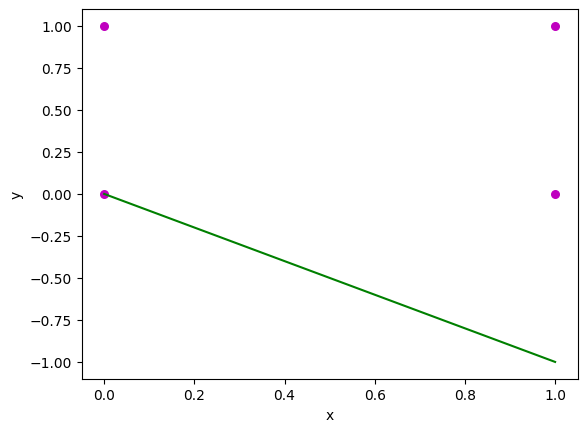

In [102]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response vector
    y_pred=[]
    for i in x:
      y_pred.append((-(b[0] + b[1]*i)/b[2]))
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()

plot_regression_line(x1, x2, witr)

softmax

In [103]:
new_data=pd.get_dummies(data,columns=['species'])

In [104]:
#softmax function
def softmax(z):
    assert len(z.shape) == 2
    s = np.max(z, axis=1)
    #print(s)
    s = s[:, np.newaxis]        # necessary step to do broadcasting
    #print(s)
    e_x = np.exp(z)
    div = np.sum(e_x, axis=1)
    div = div[:, np.newaxis]    # dito
    return e_x / div

In [106]:
a=softmax(new_data)
a

<ipython-input-104-f561b002d963>:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  s = s[:, np.newaxis]        # necessary step to do broadcasting
<ipython-input-104-f561b002d963>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  div = div[:, np.newaxis]    # dito


,sepal_length,sepal_width,petal_length,petal_width,species_0,species_1,species_2
0,0.791869,0.159876,0.019578,0.005897,0.013126,0.004828,0.004828
1,0.816994,0.122197,0.024671,0.007431,0.016540,0.006084,0.006084
2,0.763050,0.170259,0.025465,0.008477,0.018869,0.006940,0.006940
3,0.753075,0.168034,0.033925,0.009246,0.020580,0.007570,0.007570
4,0.761067,0.187677,0.020795,0.006263,0.013942,0.005128,0.005128
...,...,...,...,...,...,...,...
145,0.789927,0.019530,0.176257,0.009698,0.000972,0.000972,0.002644
146,0.759968,0.017001,0.207115,0.009330,0.001396,0.001396,0.003794
147,0.757041,0.022861,0.206318,0.008410,0.001138,0.001138,0.003094
148,0.649369,0.039488,0.291780,0.013144,0.001318,0.001318,0.003583
